In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/config.json
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/pytorch_model-00002-of-00002.bin
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/tokenizer.json
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/tokenizer_config.json
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/pytorch_model.bin.index.json
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/pytorch_model-00001-of-00002.bin
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/special_tokens_map.json
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/.gitattributes
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/tokenizer.model
/kaggle/input/mistral/pytorch/7b-instruct-v0.1-hf/1/generation_config.json
/kaggle/input/amazon-ml/student_resource/Documentation_template.md
/kaggle/input/amazon-ml/student_resource/README.md
/kaggle/input/amazon-ml/student_resource/sample_code.py
/kaggle/input/amazon-ml/student_resource/dataset/sample_test.csv
/kaggle/input/amazo

In [2]:
# ===============================
# 📦 Step 1: Imports & Load Data
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Display settings
pd.set_option('display.max_colwidth', 2000)
sns.set(style="whitegrid", palette="pastel")

# Load dataset
train = pd.read_csv("/kaggle/input/amazon-ml/student_resource/dataset/train.csv")
print("Shape of data:", train.shape)
train.head(20)


Shape of data: (75000, 4)


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.970
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0\nUnit: Count\n",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.490
5,9259,"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano\nBullet Point 2: Large Size, Chef Bottle\nBullet Point 3: Packed in the USA\nValue: 6.25\nUnit: ounce\n",https://m.media-amazon.com/images/I/81nw0HXpCRL.jpg,18.500
6,191846,"Item Name: Goya Foods Sazonador Total Seasoning, 30 Ounce (Pack of 6)\nBullet Point 1: SAZONADOR TOTAL | Enhance the natural flavors of food with the perfect mix of natural ingredients, Goya Sazonador Total. GOYA Sazonador Total adds super flavor in a flash. This versatile seasoning mix includes the perfect blend of Latino spices that makes your meal extra special. We’re sure you’ll love it.\nBullet Point 2: THE PERFECT SEASONING | GOYA Sazonador Total is the perfect blend of garlic, onion and Latin spices that adds quick flavor to any meat, chicken, fish and vegetables. Just sprinkle over meats, poultry, seafood and vegetables before cooking. You can also use it to punch up the taste of salads, sauces, and soups. A simple shake is all it takes!\nBullet Point 3: VERSATILE | This versatile seasoning mix includes the perfect blend of Latino spices that 

In [3]:
# ===============================
# 🔍 Step 2: Basic Info & Null Check
# ===============================
train.info()
print("\nMissing values:\n", train.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB

Missing values:
 sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


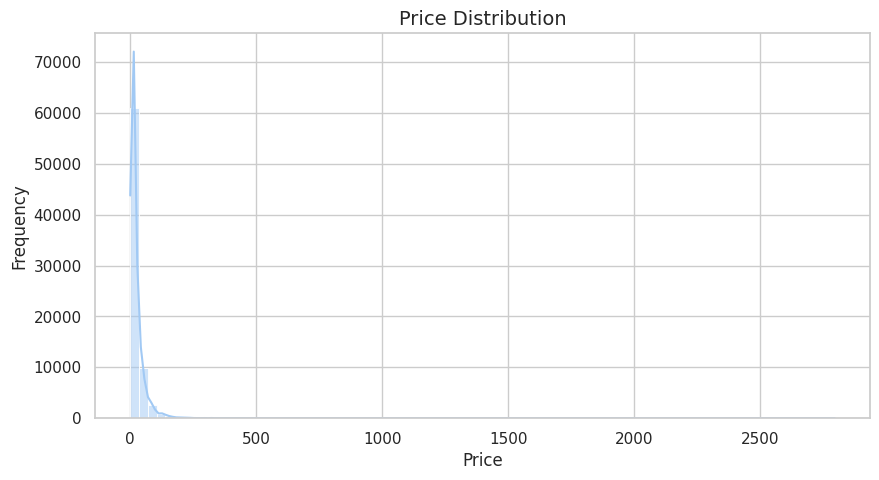

Price Summary:
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


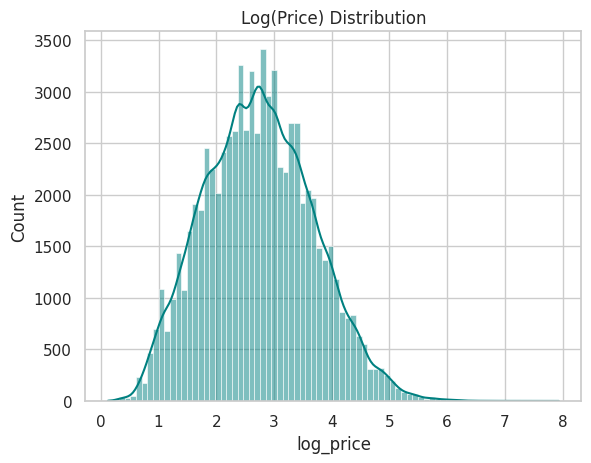

In [4]:
# ===============================
# 💲 Step 3: Price Distribution
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(train['price'], bins=80, kde=True)
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

print("Price Summary:")
print(train['price'].describe())

# Check skewness
train['log_price'] = np.log1p(train['price'])
sns.histplot(train['log_price'], bins=80, kde=True, color="teal")
plt.title("Log(Price) Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


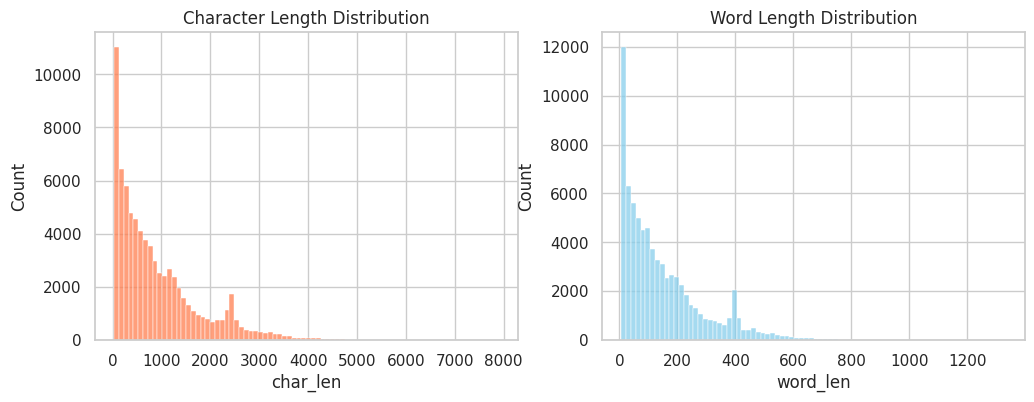

           char_len      word_len
count  75000.000000  75000.000000
mean     908.886547    147.851693
std      852.896151    137.068731
min       32.000000      7.000000
25%      251.000000     42.000000
50%      643.000000    104.000000
75%     1280.000000    208.000000
max     7894.000000   1333.000000


In [5]:
# ===============================
# 🧾 Step 4: Text Analysis
# ===============================
train['catalog_content'] = train['catalog_content'].astype(str)

# Length features
train['char_len'] = train['catalog_content'].apply(len)
train['word_len'] = train['catalog_content'].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(train['char_len'], bins=80, ax=ax[0], color='coral')
ax[0].set_title('Character Length Distribution')

sns.histplot(train['word_len'], bins=80, ax=ax[1], color='skyblue')
ax[1].set_title('Word Length Distribution')
plt.show()

print(train[['char_len','word_len']].describe())


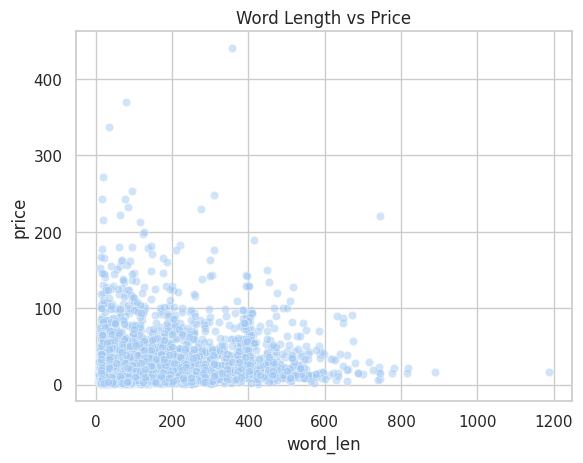

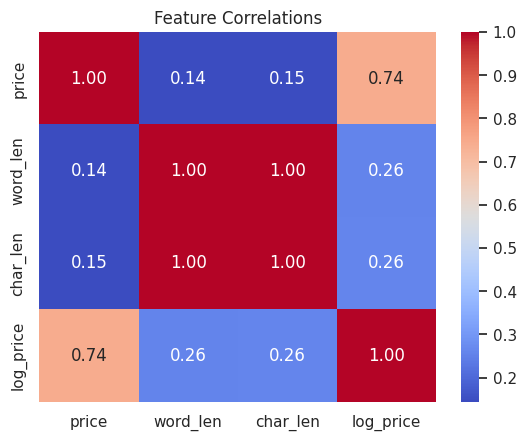

In [6]:
# ===============================
# 🧠 Step 5: Correlation Between Text Length & Price
# ===============================
sns.scatterplot(x='word_len', y='price', data=train.sample(5000), alpha=0.5)
plt.title("Word Length vs Price")
plt.show()

corr = train[['price','word_len','char_len','log_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()


In [7]:
# # ===============================
# # 📦 Step 1: Imports & Load Data
# # ===============================
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud
# import re

# # Display settings
# pd.set_option('display.max_colwidth', 200)
# sns.set(style="whitegrid", palette="pastel")

# # Load dataset
# train = pd.read_csv("/kaggle/input/dataaa/train.csv")
# print("Shape of data:", train.shape)
# train.head()


In [8]:
import pandas as pd
from IPython.display import display, HTML

# Load dataset
train = pd.read_csv("/kaggle/input/amazon-ml/student_resource/dataset/train.csv")

# Select top 10 products (or change to any slice you want)
top10 = train.head(10).copy()

# Clean catalog_content for better readability
def clean_text(text):
    text = str(text).replace("\\n", "\n")       # decode escaped newlines
    text = text.replace("Bullet Point", "\n• Bullet Point")  # make bullet points clearer
    text = text.replace("Item Name:", "\n🛍 Item Name:")      # add icons for clarity
    text = text.replace("Value:", "\n📦 Value:")
    text = text.replace("Unit:", "\n⚖️ Unit:")
    return text.strip()

top10['clean_text'] = top10['catalog_content'].apply(clean_text)

# Display neatly with images + text side-by-side
rows = []
for _, row in top10.iterrows():
    html = f"""
    <div style='border:1px solid #ddd; padding:10px; margin:10px; border-radius:8px;'>
        <h3>🆔 Sample ID: {row['sample_id']} | 💰 Price: ${row['price']:.2f}</h3>
        <div style='display:flex; gap:15px;'>
            <div style='flex:0 0 200px;'>
                <img src="{row['image_link']}" style='width:200px; border-radius:6px;'/>
            </div>
            <div style='flex:1; white-space:pre-wrap; font-size:14px;'>
                {row['clean_text']}
            </div>
        </div>
    </div>
    """
    rows.append(html)

display(HTML("".join(rows)))


In [9]:
#

# basic cleaning of the catalog content 

In [10]:
import re
import pandas as pd

def clean_catalog_content_myway(text: str) -> str:
    """Extract Item Name, Bullet Point 1 & 2, Value, and Unit from catalog_content."""
    if not isinstance(text, str):
        return ""
    
    # Initialize fields
    item_name, bp1, bp2, value, unit = "", "", "", "", ""
    
    # Extract Item Name
    match = re.search(r"Item Name:\s*(.*?)(?:\n|$)", text, re.IGNORECASE)
    if match:
        item_name = match.group(1).strip()
    
    # Extract Bullet Point 1
    match = re.search(r"Bullet Point\s*1:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp1 = match.group(1).strip()
    
    # Extract Bullet Point 2
    match = re.search(r"Bullet Point\s*2:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp2 = match.group(1).strip()
    
    # Extract Value and Unit
    match_val = re.search(r"Value:\s*([\d.,]+)", text, re.IGNORECASE)
    match_unit = re.search(r"Unit:\s*([A-Za-z]+)", text, re.IGNORECASE)
    if match_val:
        value = match_val.group(1).strip()
    if match_unit:
        unit = match_unit.group(1).strip()
    
    # Construct cleaned summary
    cleaned_text = f"Item Name: {item_name}"
    if bp1:
        cleaned_text += f"\nBullet Point 1: {bp1}"
    if bp2:
        cleaned_text += f"\nBullet Point 2: {bp2}"
    if value and unit:
        cleaned_text += f"\nValue: {value} {unit}"
    elif value:
        cleaned_text += f"\nValue: {value}"
    
    return cleaned_text.strip()

# Example usage
df = pd.read_csv("/kaggle/input/amazon-ml/student_resource/dataset/train.csv")
df["cleaned_catalog"] = df["catalog_content"].apply(clean_catalog_content_myway)

# Optional: check first few
print(df["cleaned_catalog"].head(30))


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0 Fl
1                                                                           

In [11]:
df.head()

,sample_id,catalog_content,image_link,price,cleaned_catalog
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.89,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0 Fl"
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.12,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nValue: 32.0 Ounce"
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.97,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nValue: 11.4 Ounce"
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.34,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nValue: 11.25 Ounce"
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0\nUnit: Count\n",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.49,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0 Count"


In [12]:


# Display settings
pd.set_option('display.max_colwidth', 2000)
sns.set(style="whitegrid", palette="pastel")

# Load dataset
# train = pd.read_csv("/kaggle/input/dataaa/train.csv")
print("Shape of data:", df.shape)
df.head(2)


Shape of data: (75000, 5)


,sample_id,catalog_content,image_link,price,cleaned_catalog
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.890,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0 Fl"
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.120,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nValue: 32.0 Ounce"
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.970,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nValue: 11.4 Ounce"
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.340,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nValue: 11.25 Ounce"
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0\nUnit: Count\n",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.490,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0 Count"
5,9259,"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian 

In [13]:
import re
import pandas as pd

def extract_features_from_cleaned_catalog(df):
    """
    Extract numerical and text features from cleaned_catalog column
    """
    
    def parse_single_row(text):
        """Parse a single cleaned_catalog entry"""
        if pd.isna(text):
            return {
                'item_name_clean': '',
                'bullet_points_clean': '',
                'value': None,
                'unit': '',
                'pack_count': 1,
                'total_quantity': None
            }
        
        # Initialize result dictionary
        result = {
            'item_name_clean': '',
            'bullet_points_clean': '',
            'value': None,
            'unit': '',
            'pack_count': 1,
            'total_quantity': None
        }
        
        # Extract Item Name
        item_match = re.search(r'Item Name:\s*(.+?)(?:\n|$)', text)
        if item_match:
            item_name = item_match.group(1).strip()
            # Remove pack information and sizes from item name for clean text
            # But first extract pack count
            pack_match = re.search(r'\(Pack of (\d+)\)', item_name)
            if pack_match:
                result['pack_count'] = int(pack_match.group(1))
            
            # Clean item name: remove numbers, pack info, measurements
            item_clean = re.sub(r'\d+\.?\d*\s*(Ounce|Oz|Fl Oz|Pound|Lb|Count|Pack|Gram|Kg|Liter|mL|Gallon)', '', item_name, flags=re.IGNORECASE)
            item_clean = re.sub(r'\(Pack of \d+\)', '', item_clean)
            item_clean = re.sub(r'\s+', ' ', item_clean).strip()
            result['item_name_clean'] = item_clean
        
        # Extract Bullet Points
        bullet_points = re.findall(r'Bullet Point \d+:\s*(.+?)(?=\nBullet Point \d+:|\nValue:|\nUnit:|\nProduct Description:|$)', text, re.DOTALL)
        if bullet_points:
            # Clean bullet points: keep descriptive text, remove excessive numbers
            bullets_clean = ' '.join([bp.strip() for bp in bullet_points])
            result['bullet_points_clean'] = bullets_clean
        
        # Extract Value
        value_match = re.search(r'Value:\s*(\d+\.?\d*)', text)
        if value_match:
            result['value'] = float(value_match.group(1))
        
        # Extract Unit
        unit_match = re.search(r'Unit:\s*(.+?)(?:\n|$)', text)
        if unit_match:
            result['unit'] = unit_match.group(1).strip()
        
        # Calculate total quantity
        if result['value'] is not None:
            result['total_quantity'] = result['value'] * result['pack_count']
        
        return result
    
    # Apply parsing to all rows
    parsed_data = df['cleaned_catalog'].apply(parse_single_row)
    
    # Convert to DataFrame
    parsed_df = pd.DataFrame(parsed_data.tolist())
    
    # Add unit encoding (categorical to numeric)
    unit_mapping = {
        'Ounce': 1, 'Oz': 1,
        'Fl Oz': 2, 'Fluid Ounce': 2,
        'Pound': 3, 'Lb': 3,
        'Count': 4,
        'Gram': 5, 'G': 5,
        'Kilogram': 6, 'Kg': 6,
        'Liter': 7, 'L': 7,
        'Milliliter': 8, 'mL': 8, 'ml': 8,
        'Gallon': 9,
        'Piece': 10,
        'Each': 11
    }
    
    def encode_unit(unit):
        if pd.isna(unit) or unit == '':
            return 0
        # Normalize unit
        unit_normalized = unit.strip().title()
        return unit_mapping.get(unit_normalized, 0)
    
    parsed_df['unit_encoded'] = parsed_df['unit'].apply(encode_unit)
    
    # Combine item name and bullet points for text embedding
    parsed_df['text_for_embedding'] = (
        parsed_df['item_name_clean'] + ' ' + parsed_df['bullet_points_clean']
    ).str.strip()
    
    # Handle missing values
    parsed_df['value'] = parsed_df['value'].fillna(0)
    parsed_df['total_quantity'] = parsed_df['total_quantity'].fillna(0)
    
    return parsed_df

# Apply the extraction
extracted_features = extract_features_from_cleaned_catalog(df)

# Combine with original dataframe
df_enhanced = pd.concat([df, extracted_features], axis=1)

# Display sample results
print("Sample of extracted features:")
print(df_enhanced[['sample_id', 'item_name_clean', 'value', 'unit', 'pack_count', 
                    'total_quantity', 'unit_encoded', 'text_for_embedding']].head())

print(f"\nShape: {df_enhanced.shape}")
print(f"\nColumns: {df_enhanced.columns.tolist()}")

Sample of extracted features:
   sample_id  \
0      33127   
1     198967   
2     261251   
3      55858   
4     292686   

                                                                                                                                    item_name_clean  \
0                                                                                                                La Victoria Green Taco Sauce Mild,   
1                                                                                                     Salerno Cookies, The Original Butter Cookies,   
2                                                                                            Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice,   
3  Judee’s Blue Cheese Powder - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA   
4                                                                                                         kedem Sherry

# df enhanced with cleaned catalog

In [14]:
df_enhanced.head()

,sample_id,catalog_content,image_link,price,cleaned_catalog,item_name_clean,bullet_points_clean,value,unit,pack_count,total_quantity,unit_encoded,text_for_embedding
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.89,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0 Fl","La Victoria Green Taco Sauce Mild,",,72.00,,6,432.00,0,"La Victoria Green Taco Sauce Mild,"
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.12,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nValue: 32.0 Ounce","Salerno Cookies, The Original Butter Cookies,",Original Butter Cookies: Classic butter cookies made with real butter Variety Pack: Includes 4 boxes with 32 cookies total,32.00,,4,128.00,0,"Salerno Cookies, The Original Butter Cookies, Original Butter Cookies: Classic butter cookies made with real butter Variety Pack: Includes 4 boxes with 32 cookies total"
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.97,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nValue: 11.4 Ounce","Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice,",Loaded with hearty long grain wild rice and vegetables Full of hearty goodness,11.40,,6,68.40,0,"Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, Loaded with hearty long grain wild rice and vegetables Full of hearty goodness"
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",https://m.media-amazon.com/images/I/4

# embedding 

In [15]:
!pip install --upgrade pyarrow
!pip install "pydantic<2.12,>=2.0"


In [16]:
!pip install --upgrade torch torchvision sentence-transformers transformers tqdm pillow


  Using cached torch-2.8.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached sentence_transformers-5.1.1-py3-none-any.whl.metadata (16 kB)
  Using cached transformers-4.57.0-py3-none-any.whl.metadata (41 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_

In [17]:
!pip install -q sentence-transformers transformers torchvision tqdm



In [18]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [19]:
!mkdir -p /kaggle/working/all-MiniLM-L6-v2
!pip install huggingface_hub --upgrade

from huggingface_hub import snapshot_download

# Download model locally
local_model_path = snapshot_download(repo_id="sentence-transformers/all-MiniLM-L6-v2")
print(f"Model downloaded at: {local_model_path}")


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

data_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

onnx/model.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

onnx/model_O1.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

onnx/model_O2.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

onnx/model_O3.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

onnx/model_O4.onnx:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

onnx/model_qint8_arm64.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

onnx/model_quint8_avx2.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

openvino/openvino_model.bin:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

openvino_model.xml: 0.00B [00:00, ?B/s]

openvino/openvino_model_qint8_quantized.(…):   0%|          | 0.00/22.9M [00:00<?, ?B/s]

openvino_model_qint8_quantized.xml: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/91.0M [00:00<?, ?B/s]

train_script.py: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Model downloaded at: /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/c9745ed1d9f207416be6d2e6f8de32d1f16199bf


In [20]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(local_model_path)  # load from downloaded folder
embeddings = model.encode(["This is a test"], convert_to_numpy=True)
print(embeddings.shape)


2025-10-11 22:22:42.477478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760221362.854467     120 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760221362.949659     120 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 384)


In [21]:
import os
os.environ['TRANSFORMERS_CACHE'] = '/kaggle/working/transformers_cache'
os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/kaggle/working/sentence_transformers_cache'


In [22]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

# -----------------------------
# Set device
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# -----------------------------
# Download and load SentenceTransformer locally
# -----------------------------
!pip install huggingface_hub --upgrade
from huggingface_hub import snapshot_download
from sentence_transformers import SentenceTransformer

# Download model locally (only once)
local_model_path = snapshot_download(repo_id="sentence-transformers/all-MiniLM-L6-v2")
print(f"Model downloaded at: {local_model_path}")

# Load model from local path
text_model = SentenceTransformer(local_model_path)
text_model = text_model.to(device)

# -----------------------------
# 1. TEXT EMBEDDINGS
# -----------------------------
def create_text_embeddings(texts, batch_size=32):
    """
    Create text embeddings using SentenceTransformer
    
    Args:
        texts: List or Series of text strings
        batch_size: Batch size for encoding
    
    Returns:
        numpy array of embeddings
    """
    text_list = texts.fillna('').tolist()
    print(f"Creating embeddings for {len(text_list)} texts...")

    embeddings = text_model.encode(
        text_list,
        batch_size=batch_size,
        show_progress_bar=True,
        convert_to_numpy=True,
        device=device
    )
    
    print(f"Text embeddings shape: {embeddings.shape}")
    return embeddings

# -----------------------------
# 2. IMAGE EMBEDDINGS (CLIP)
# -----------------------------
def create_image_embeddings_clip(image_paths, batch_size=32):
    """
    Create image embeddings using CLIP model
    """
    from transformers import CLIPProcessor, CLIPModel

    print("Loading CLIP model...")
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    clip_model.eval()

    embeddings_list = []

    for i in tqdm(range(0, len(image_paths), batch_size)):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = []

        for img_path in batch_paths:
            try:
                if pd.notna(img_path) and os.path.exists(img_path):
                    img = Image.open(img_path).convert('RGB')
                    batch_images.append(img)
                else:
                    batch_images.append(Image.new('RGB', (224, 224), (255, 255, 255)))
            except:
                batch_images.append(Image.new('RGB', (224, 224), (255, 255, 255)))

        # Process batch
        with torch.no_grad():
            inputs = processor(images=batch_images, return_tensors="pt", padding=True)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            features = clip_model.get_image_features(**inputs)
            embeddings_list.append(features.cpu().numpy())

    embeddings = np.vstack(embeddings_list)
    print(f"Image embeddings shape: {embeddings.shape}")
    return embeddings

# -----------------------------
# 3. Load your dataset
# -----------------------------
# Assuming you already have df_enhanced with:
# 'text_for_embedding', 'image_path', 'value', 'pack_count', 'total_quantity', 'unit_encoded'

# Text embeddings
text_embeddings = create_text_embeddings(df_enhanced['text_for_embedding'], batch_size=64)
np.save('text_embeddings.npy', text_embeddings)

# Image embeddings (download images first if needed)
# image_embeddings = create_image_embeddings_clip(df_enhanced['image_path'], batch_size=32)
# np.save('image_embeddings.npy', image_embeddings)

# -----------------------------
# 4. Combine with numerical features
# -----------------------------
numerical_features = df_enhanced[['value', 'pack_count', 'total_quantity', 'unit_encoded']].values
X_text_num = np.concatenate([text_embeddings, numerical_features], axis=1)
np.save('X_text_num.npy', X_text_num)
print(f"Combined text + numerical features saved: {X_text_num.shape}")


Using device: cuda


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

Model downloaded at: /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/c9745ed1d9f207416be6d2e6f8de32d1f16199bf
Creating embeddings for 75000 texts...


Batches:   0%|          | 0/1172 [00:00<?, ?it/s]

Text embeddings shape: (75000, 384)
Combined text + numerical features saved: (75000, 388)


In [25]:
df_enhanced.head()

,sample_id,catalog_content,image_link,price,cleaned_catalog,item_name_clean,bullet_points_clean,value,unit,pack_count,total_quantity,unit_encoded,text_for_embedding,image_path
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.89,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0 Fl","La Victoria Green Taco Sauce Mild,",,72.00,,6,432.00,0,"La Victoria Green Taco Sauce Mild,",/kaggle/working/images/0.jpg
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.12,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nValue: 32.0 Ounce","Salerno Cookies, The Original Butter Cookies,",Original Butter Cookies: Classic butter cookies made with real butter Variety Pack: Includes 4 boxes with 32 cookies total,32.00,,4,128.00,0,"Salerno Cookies, The Original Butter Cookies, Original Butter Cookies: Classic butter cookies made with real butter Variety Pack: Includes 4 boxes with 32 cookies total",/kaggle/working/images/1.jpg
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.97,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nValue: 11.4 Ounce","Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice,",Loaded with hearty long grain wild rice and vegetables Full of hearty goodness,11.40,,6,68.40,0,"Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, Loaded with hearty long grain wild rice and vegetables Full of hearty goodness",/kaggle/working/images/2.jpg
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buf

In [24]:
import numpy as np

# Load embeddings
text_embeddings = np.load("text_embeddings.npy")

# Check shape
print("Embedding shape:", text_embeddings.shape)

# See a small sample (first 5 vectors)
print("\nSample embeddings (first 5 rows):")
print(text_embeddings[:5])


Embedding shape: (75000, 384)

Sample embeddings (first 5 rows):
[[ 0.0346089  -0.06049876  0.0151022  ...  0.0463715   0.05795527
  -0.03457242]
 [-0.0332548   0.00189486 -0.03471969 ...  0.01751352  0.04595337
   0.0249126 ]
 [-0.04662432  0.006897    0.08985693 ...  0.03778796 -0.00120527
  -0.00796324]
 [-0.0645333  -0.07475875  0.04972717 ... -0.03652836  0.04001872
   0.05288167]
 [ 0.0594268   0.07255923 -0.04829806 ... -0.06497304  0.02476517
  -0.03393902]]


In [ ]:
xxx
import os
import requests
from tqdm import tqdm
from PIL import Image
from io import BytesIO

# Step 1: Create folder to store images
image_folder = "/kaggle/working/images"
os.makedirs(image_folder, exist_ok=True)

# Step 2: Function to download an image
def download_image(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img.save(save_path)
        return True
    except Exception as e:
        print(f"Failed for {url}: {e}")
        # Save a blank image as placeholder
        Image.new('RGB', (224, 224), (255, 255, 255)).save(save_path)
        return False

# Step 3: Download all images carefully by index
df_enhanced['image_path'] = ""  # new column to store local paths

for idx, url in tqdm(df_enhanced['image_link'].items(), total=len(df_enhanced)):
    filename = f"{idx}.jpg"  # use index as filename
    path = os.path.join(image_folder, filename)
    download_image(url, path)
    df_enhanced.at[idx, 'image_path'] = path  # ensure correct mapping

print("\nAll images downloaded and paths updated in dataframe.")


# my testing 1

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 1. Load Data and Embeddings
# -----------------------------
print("Loading data and embeddings...")

# Load your enhanced dataframe
# df_enhanced = pd.read_csv('your_enhanced_data.csv')  # Adjust path as needed

# Load text embeddings (already created)
text_embeddings = np.load('text_embeddings.npy')
print(f"Text embeddings shape: {text_embeddings.shape}")

# Extract numerical features
numerical_features = df_enhanced[['value', 'pack_count', 'total_quantity', 'unit_encoded']].values
print(f"Numerical features shape: {numerical_features.shape}")

# Target variable
y = df_enhanced['price'].values
print(f"Target shape: {y.shape}")

# -----------------------------
# 2. Feature Scaling & Combination
# -----------------------------
print("\nScaling numerical features...")

# Scale numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Combine text embeddings with scaled numerical features
X_combined = np.concatenate([text_embeddings, numerical_features_scaled], axis=1)
print(f"Combined features shape: {X_combined.shape}")

# Save combined features for later use
np.save('X_combined.npy', X_combined)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
print("\nSplitting data...")
X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

# -----------------------------
# 4. SMAPE Metric Implementation
# -----------------------------
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred)
    smape_val = np.mean(diff / denominator) * 100
    return smape_val

# -----------------------------
# 5. Model 1: XGBoost
# -----------------------------
print("\n" + "="*50)
print("Training XGBoost Model")
print("="*50)

xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 8,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'tree_method': 'hist',
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

evals = [(dtrain, 'train'), (dval, 'val')]

print("Training XGBoost...")
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=50
)

# Predictions
y_pred_xgb = xgb_model.predict(dval)
smape_xgb = smape(y_val, y_pred_xgb)
print(f"\nXGBoost Validation SMAPE: {smape_xgb:.4f}%")

# -----------------------------
# 6. Model 2: LightGBM
# -----------------------------
print("\n" + "="*50)
print("Training LightGBM Model")
print("="*50)

lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'max_depth': 8,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'verbose': -1,
    'device': 'gpu' if torch.cuda.is_available() else 'cpu'
}

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

print("Training LightGBM...")
lgb_model = lgb.train(
    lgb_params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'val'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# Predictions
y_pred_lgb = lgb_model.predict(X_val)
smape_lgb = smape(y_val, y_pred_lgb)
print(f"\nLightGBM Validation SMAPE: {smape_lgb:.4f}%")

# -----------------------------
# 7. Ensemble (Average)
# -----------------------------
print("\n" + "="*50)
print("Creating Ensemble Model")
print("="*50)

y_pred_ensemble = (y_pred_xgb + y_pred_lgb) / 2
smape_ensemble = smape(y_val, y_pred_ensemble)
print(f"Ensemble Validation SMAPE: {smape_ensemble:.4f}%")

# -----------------------------
# 8. Feature Importance Analysis
# -----------------------------
print("\n" + "="*50)
print("Feature Importance (Top 20)")
print("="*50)

# Get feature importance from XGBoost
importance_dict = xgb_model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'importance': list(importance_dict.values())
}).sort_values('importance', ascending=False).head(20)

print(importance_df)

# -----------------------------
# 9. Save Models
# -----------------------------
print("\nSaving models...")
xgb_model.save_model('xgboost_price_model.json')
lgb_model.save_model('lightgbm_price_model.txt')
np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)

print("\n✓ Models and scaler saved successfully!")

# -----------------------------
# 10. Summary
# -----------------------------
print("\n" + "="*50)
print("TRAINING SUMMARY")
print("="*50)
print(f"XGBoost SMAPE:    {smape_xgb:.4f}%")
print(f"LightGBM SMAPE:   {smape_lgb:.4f}%")
print(f"Ensemble SMAPE:   {smape_ensemble:.4f}%")
print(f"\nBest Model: {'XGBoost' if smape_xgb < smape_lgb else 'LightGBM'}")
print("="*50)

Loading data and embeddings...
Text embeddings shape: (75000, 384)
Numerical features shape: (75000, 4)
Target shape: (75000,)

Scaling numerical features...
Combined features shape: (75000, 388)

Splitting data...
Training set: (60000, 388)
Validation set: (15000, 388)

Training XGBoost Model
Training XGBoost...
[0]	train-rmse:31.49394	val-rmse:38.66177
[50]	train-rmse:21.72809	val-rmse:35.02134
[100]	train-rmse:17.91849	val-rmse:34.32629
[150]	train-rmse:15.62374	val-rmse:33.99296
[200]	train-rmse:14.07022	val-rmse:33.79945
[250]	train-rmse:12.88743	val-rmse:33.67319
[300]	train-rmse:11.85921	val-rmse:33.57317
[350]	train-rmse:10.96261	val-rmse:33.51622
[400]	train-rmse:10.15336	val-rmse:33.45191
[450]	train-rmse:9.48138	val-rmse:33.41829
[500]	train-rmse:8.85476	val-rmse:33.37753
[550]	train-rmse:8.30395	val-rmse:33.35861
[600]	train-rmse:7.79821	val-rmse:33.33020
[650]	train-rmse:7.33206	val-rmse:33.31368
[700]	train-rmse:6.92521	val-rmse:33.30299
[750]	train-rmse:6.54361	val-rmse:

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Training until validation scores don't improve for 50 rounds
[50]	train's l1: 14.5675	val's l1: 15.8638
[100]	train's l1: 13.1643	val's l1: 15.1112
[150]	train's l1: 12.25	val's l1: 14.7504
[200]	train's l1: 11.5433	val's l1: 14.5215
[250]	train's l1: 10.9726	val's l1: 14.3716
[300]	train's l1: 10.4917	val's l1: 14.2819
[350]	train's l1: 10.0425	val's l1: 14.2017
[400]	train's l1: 9.65209	val's l1: 14.142
[450]	train's l1: 9.28584	val's l1: 14.0957
[500]	train's l1: 8.94272	val's l1: 14.0642
[550]	train's l1: 8.62001	val's l1: 14.0228
[600]	train's l1: 8.32745	val's l1: 13.9931
[650]	train's l1: 8.04679	val's l1: 13.9693
[700]	train's l1: 7.76875	val's l1: 13.9432
[750]	train's l1: 7.51011	val's l1: 13.9099
[800]	train's l1: 7.27396	val's l1: 13.8898
[850]	train's l1: 7.0417	val's l1: 13.8765
[900]	train's l1: 6.81767	val's l1: 13.8531
[950]	train's l1: 6.60251	val's l1: 13.844
[1000]	train's l1: 6.39613	val's l1: 13.8333
Did not meet early stopping. Best iteration is:
[993]	train's l1

In [ ]:
# -----------------------------
# PREDICTION SCRIPT FOR TEST DATA
# -----------------------------
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import torch
from tqdm import tqdm

print("Loading test data...")
df_test = pd.read_csv('/kaggle/input/amazon-ml/student_resource/dataset/test.csv')

# Load your text model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
text_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
text_model = text_model.to(device)

# -----------------------------
# Process test data same as training
# -----------------------------
# (You need to apply the same preprocessing to df_test as you did to df_enhanced)
# This includes extracting: value, unit_encoded, pack_count, total_quantity
# Assuming you have df_test_enhanced after preprocessing

print("Creating text embeddings for test data...")
test_text_embeddings = text_model.encode(
    df_test_enhanced['text_for_embedding'].fillna('').tolist(),
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    device=device
)

# Extract numerical features
test_numerical = df_test_enhanced[['value', 'pack_count', 'total_quantity', 'unit_encoded']].values

# Load scaler parameters
scaler = StandardScaler()
scaler.mean_ = np.load('scaler_mean.npy')
scaler.scale_ = np.load('scaler_scale.npy')

# Scale numerical features
test_numerical_scaled = scaler.transform(test_numerical)

# Combine features
X_test_combined = np.concatenate([test_text_embeddings, test_numerical_scaled], axis=1)

# -----------------------------
# Load models and predict
# -----------------------------
print("Loading models...")
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_price_model.json')

lgb_model = lgb.Booster(model_file='lightgbm_price_model.txt')

# Predictions
print("Making predictions...")
dtest = xgb.DMatrix(X_test_combined)
pred_xgb = xgb_model.predict(dtest)
pred_lgb = lgb_model.predict(X_test_combined)

# Ensemble
pred_ensemble = (pred_xgb + pred_lgb) / 2

# -----------------------------
# Create submission file
# -----------------------------
submission = pd.DataFrame({
    'sample_id': df_test['sample_id'],
    'price': pred_ensemble
})

# Ensure all prices are positive
submission['price'] = submission['price'].clip(lower=0.01)

# Save
submission.to_csv('test_out.csv', index=False)
print(f"\n✓ Predictions saved to test_out.csv")
print(f"Total predictions: {len(submission)}")
print(f"Price range: ${submission['price'].min():.2f} - ${submission['price'].max():.2f}")
print(f"Mean price: ${submission['price'].mean():.2f}")

In [27]:
# -----------------------------
# COMPLETE PREDICTION SCRIPT FOR TEST DATA
# -----------------------------
import re
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import torch
from tqdm import tqdm

print("="*50)
print("STARTING TEST DATA PREDICTION PIPELINE")
print("="*50)

# -----------------------------
# 1. Load Test Data
# -----------------------------
print("\n[1/7] Loading test data...")
df_test = pd.read_csv('/kaggle/input/amazon-ml/student_resource/dataset/test.csv')
print(f"Test data shape: {df_test.shape}")

# -----------------------------
# 2. Clean Catalog Content
# -----------------------------
print("\n[2/7] Cleaning catalog content...")

def clean_catalog_content_myway(text: str) -> str:
    """Extract Item Name, Bullet Point 1 & 2, Value, and Unit from catalog_content."""
    if not isinstance(text, str):
        return ""
    
    # Initialize fields
    item_name, bp1, bp2, value, unit = "", "", "", "", ""
    
    # Extract Item Name
    match = re.search(r"Item Name:\s*(.*?)(?:\n|$)", text, re.IGNORECASE)
    if match:
        item_name = match.group(1).strip()
    
    # Extract Bullet Point 1
    match = re.search(r"Bullet Point\s*1:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp1 = match.group(1).strip()
    
    # Extract Bullet Point 2
    match = re.search(r"Bullet Point\s*2:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp2 = match.group(1).strip()
    
    # Extract Value and Unit
    match_val = re.search(r"Value:\s*([\d.,]+)", text, re.IGNORECASE)
    match_unit = re.search(r"Unit:\s*([A-Za-z]+)", text, re.IGNORECASE)
    if match_val:
        value = match_val.group(1).strip()
    if match_unit:
        unit = match_unit.group(1).strip()
    
    # Construct cleaned summary
    cleaned_text = f"Item Name: {item_name}"
    if bp1:
        cleaned_text += f"\nBullet Point 1: {bp1}"
    if bp2:
        cleaned_text += f"\nBullet Point 2: {bp2}"
    if value and unit:
        cleaned_text += f"\nValue: {value} {unit}"
    elif value:
        cleaned_text += f"\nValue: {value}"
    
    return cleaned_text.strip()

df_test["cleaned_catalog"] = df_test["catalog_content"].apply(clean_catalog_content_myway)
print("✓ Catalog content cleaned")

# -----------------------------
# 3. Extract Features
# -----------------------------
print("\n[3/7] Extracting features from cleaned catalog...")

def extract_features_from_cleaned_catalog(df):
    """
    Extract numerical and text features from cleaned_catalog column
    """
    
    def parse_single_row(text):
        """Parse a single cleaned_catalog entry"""
        if pd.isna(text):
            return {
                'item_name_clean': '',
                'bullet_points_clean': '',
                'value': None,
                'unit': '',
                'pack_count': 1,
                'total_quantity': None
            }
        
        # Initialize result dictionary
        result = {
            'item_name_clean': '',
            'bullet_points_clean': '',
            'value': None,
            'unit': '',
            'pack_count': 1,
            'total_quantity': None
        }
        
        # Extract Item Name
        item_match = re.search(r'Item Name:\s*(.+?)(?:\n|$)', text)
        if item_match:
            item_name = item_match.group(1).strip()
            # Remove pack information and sizes from item name for clean text
            # But first extract pack count
            pack_match = re.search(r'\(Pack of (\d+)\)', item_name)
            if pack_match:
                result['pack_count'] = int(pack_match.group(1))
            
            # Clean item name: remove numbers, pack info, measurements
            item_clean = re.sub(r'\d+\.?\d*\s*(Ounce|Oz|Fl Oz|Pound|Lb|Count|Pack|Gram|Kg|Liter|mL|Gallon)', '', item_name, flags=re.IGNORECASE)
            item_clean = re.sub(r'\(Pack of \d+\)', '', item_clean)
            item_clean = re.sub(r'\s+', ' ', item_clean).strip()
            result['item_name_clean'] = item_clean
        
        # Extract Bullet Points
        bullet_points = re.findall(r'Bullet Point \d+:\s*(.+?)(?=\nBullet Point \d+:|\nValue:|\nUnit:|\nProduct Description:|$)', text, re.DOTALL)
        if bullet_points:
            # Clean bullet points: keep descriptive text, remove excessive numbers
            bullets_clean = ' '.join([bp.strip() for bp in bullet_points])
            result['bullet_points_clean'] = bullets_clean
        
        # Extract Value
        value_match = re.search(r'Value:\s*(\d+\.?\d*)', text)
        if value_match:
            result['value'] = float(value_match.group(1))
        
        # Extract Unit
        unit_match = re.search(r'Unit:\s*(.+?)(?:\n|$)', text)
        if unit_match:
            result['unit'] = unit_match.group(1).strip()
        
        # Calculate total quantity
        if result['value'] is not None:
            result['total_quantity'] = result['value'] * result['pack_count']
        
        return result
    
    # Apply parsing to all rows
    parsed_data = df['cleaned_catalog'].apply(parse_single_row)
    
    # Convert to DataFrame
    parsed_df = pd.DataFrame(parsed_data.tolist())
    
    # Add unit encoding (categorical to numeric)
    unit_mapping = {
        'Ounce': 1, 'Oz': 1,
        'Fl Oz': 2, 'Fluid Ounce': 2,
        'Pound': 3, 'Lb': 3,
        'Count': 4,
        'Gram': 5, 'G': 5,
        'Kilogram': 6, 'Kg': 6,
        'Liter': 7, 'L': 7,
        'Milliliter': 8, 'mL': 8, 'ml': 8,
        'Gallon': 9,
        'Piece': 10,
        'Each': 11
    }
    
    def encode_unit(unit):
        if pd.isna(unit) or unit == '':
            return 0
        # Normalize unit
        unit_normalized = unit.strip().title()
        return unit_mapping.get(unit_normalized, 0)
    
    parsed_df['unit_encoded'] = parsed_df['unit'].apply(encode_unit)
    
    # Combine item name and bullet points for text embedding
    parsed_df['text_for_embedding'] = (
        parsed_df['item_name_clean'] + ' ' + parsed_df['bullet_points_clean']
    ).str.strip()
    
    # Handle missing values
    parsed_df['value'] = parsed_df['value'].fillna(0)
    parsed_df['total_quantity'] = parsed_df['total_quantity'].fillna(0)
    
    return parsed_df

# Apply feature extraction
extracted_features = extract_features_from_cleaned_catalog(df_test)

# Combine with original test dataframe
df_test_enhanced = pd.concat([df_test, extracted_features], axis=1)

print(f"✓ Features extracted")
print(f"Enhanced test data shape: {df_test_enhanced.shape}")
print(f"Sample features:\n{df_test_enhanced[['sample_id', 'item_name_clean', 'value', 'unit_encoded', 'pack_count', 'total_quantity']].head()}")

# -----------------------------
# 4. Load Text Model and Create Embeddings
# -----------------------------
print("\n[4/7] Loading text model and creating embeddings...")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

text_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
text_model = text_model.to(device)

print("Creating text embeddings for test data...")
test_text_embeddings = text_model.encode(
    df_test_enhanced['text_for_embedding'].fillna('').tolist(),
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    device=device
)

print(f"✓ Test text embeddings shape: {test_text_embeddings.shape}")

# -----------------------------
# 5. Prepare Numerical Features
# -----------------------------
print("\n[5/7] Preparing numerical features...")

# Extract numerical features
test_numerical = df_test_enhanced[['value', 'pack_count', 'total_quantity', 'unit_encoded']].values
print(f"Test numerical features shape: {test_numerical.shape}")

# Load scaler parameters from training
scaler = StandardScaler()
scaler.mean_ = np.load('scaler_mean.npy')
scaler.scale_ = np.load('scaler_scale.npy')

# Scale numerical features
test_numerical_scaled = scaler.transform(test_numerical)

# Combine text embeddings with scaled numerical features
X_test_combined = np.concatenate([test_text_embeddings, test_numerical_scaled], axis=1)
print(f"✓ Combined test features shape: {X_test_combined.shape}")


# -----------------------------
# 6. Load Models and Make Predictions
# -----------------------------
print("\n[6/7] Loading models and making predictions...")

# Load XGBoost model
print("Loading XGBoost model...")
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_price_model.json')

# Load LightGBM model
print("Loading LightGBM model...")
lgb_model = lgb.Booster(model_file='lightgbm_price_model.txt')

# Make predictions with XGBoost
print("Predicting with XGBoost...")
dtest = xgb.DMatrix(X_test_combined)
pred_xgb = xgb_model.predict(dtest)

# Make predictions with LightGBM
print("Predicting with LightGBM...")
pred_lgb = lgb_model.predict(X_test_combined)

# Ensemble predictions (average)
print("Creating ensemble predictions...")
pred_ensemble = (pred_xgb + pred_lgb) / 2

print("✓ Predictions complete")

# -----------------------------
# 7. Create Submission File
# -----------------------------
print("\n[7/7] Creating submission file...")

submission = pd.DataFrame({
    'sample_id': df_test['sample_id'],
    'price': pred_ensemble
})

# Ensure all prices are positive
submission['price'] = submission['price'].clip(lower=0.01)

# Save submission
submission.to_csv('test_out.csv', index=False)

print("\n" + "="*50)
print("PREDICTION PIPELINE COMPLETED!")
print("="*50)
print(f"✓ Predictions saved to: test_out.csv")
print(f"Total predictions: {len(submission)}")
print(f"Price statistics:")
print(f"  - Min:    ${submission['price'].min():.2f}")
print(f"  - Max:    ${submission['price'].max():.2f}")
print(f"  - Mean:   ${submission['price'].mean():.2f}")
print(f"  - Median: ${submission['price'].median():.2f}")
print("="*50)

# Display first few predictions
print("\nFirst 10 predictions:")
print(submission.head(10))

STARTING TEST DATA PREDICTION PIPELINE

[1/7] Loading test data...
Test data shape: (75000, 3)

[2/7] Cleaning catalog content...
✓ Catalog content cleaned

[3/7] Extracting features from cleaned catalog...
✓ Features extracted
Enhanced test data shape: (75000, 12)
Sample features:
   sample_id  \
0     100179   
1     245611   
2     146263   
3      95658   
4      36806   

                                                                                                                                                                                              item_name_clean  \
0                                                                          Rani 14-Spice Eshamaya's Mango Chutney (Indian Preserve) (300g) Glass Jar, Ready to eat, Vegan ~ Gluten Free, All Natural, NON-GMO   
1  Natural MILK TEA Flavoring extract by HALO PANTRY ( bottle) | Perfect for customizing ANY baking, candy, dessert or drink recipes | Dairy Free, Dye-Free, Gluten Free, Zero Sugars, Zero Calories, Gour

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Creating text embeddings for test data...


Batches:   0%|          | 0/1172 [00:00<?, ?it/s]

✓ Test text embeddings shape: (75000, 384)

[5/7] Preparing numerical features...
Test numerical features shape: (75000, 4)
✓ Combined test features shape: (75000, 388)

[6/7] Loading models and making predictions...
Loading XGBoost model...
Loading LightGBM model...
Predicting with XGBoost...
Predicting with LightGBM...
Creating ensemble predictions...
✓ Predictions complete

[7/7] Creating submission file...

PREDICTION PIPELINE COMPLETED!
✓ Predictions saved to: test_out.csv
Total predictions: 75000
Price statistics:
  - Min:    $0.01
  - Max:    $617.85
  - Mean:   $23.94
  - Median: $19.89

First 10 predictions:
   sample_id      price
0     100179  15.892740
1     245611  17.723775
2     146263  23.894178
3      95658   7.630843
4      36806  35.858449
5     148239  12.549311
6      92659  11.725893
7       3780  16.520893
8     196940  23.169688
9      20472  11.241948


# TEST 2 

In [30]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sentence_transformers import SentenceTransformer
from scipy.optimize import minimize
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ======================================================
# 1. Load Data and Generate Text Embeddings (Advanced)
# ======================================================
print("Loading data and generating embeddings...")

# df_enhanced = pd.read_csv('your_enhanced_data.csv')

# Choose advanced embedding model (recommended: E5-large)
text_model = SentenceTransformer('intfloat/e5-large-v2')

# Generate embeddings from combined clean text fields
df_enhanced['text_for_embedding'] = (
    df_enhanced['item_name_clean'].fillna('') + ' ' +
    df_enhanced['bullet_points_clean'].fillna('')
)
text_embeddings = text_model.encode(df_enhanced['text_for_embedding'].tolist(), show_progress_bar=True)
print(f"Text embeddings shape: {text_embeddings.shape}")

# ======================================================
# 2. Advanced Feature Engineering
# ======================================================
def extract_advanced_features(df):
    def extract_brand(text):
        if pd.isna(text):
            return 'unknown'
        words = text.split()
        return words[0].lower() if words else 'unknown'
    
    df['brand'] = df['item_name_clean'].apply(extract_brand)
    df['item_name_length'] = df['item_name_clean'].str.len()
    df['bullet_points_length'] = df['bullet_points_clean'].str.len()
    df['text_word_count'] = df['text_for_embedding'].str.split().str.len()
    df['value_per_pack'] = df['value'] / df['pack_count'].clip(lower=1)
    df['is_multipack'] = (df['pack_count'] > 1).astype(int)
    df['is_weight_unit'] = df['unit'].str.lower().str.contains('ounce|oz|pound|lb|gram|kg', na=False).astype(int)
    df['is_volume_unit'] = df['unit'].str.lower().str.contains('fl oz|liter|ml|gallon', na=False).astype(int)
    df['is_count_unit'] = df['unit'].str.lower().str.contains('count|piece|each', na=False).astype(int)
    df['log_value'] = np.log1p(df['value'])
    df['log_total_quantity'] = np.log1p(df['total_quantity'])
    return df

df_enhanced = extract_advanced_features(df_enhanced)

# ======================================================
# 3. Prepare Features and Target
# ======================================================
numerical_cols = [
    'value', 'pack_count', 'total_quantity', 'unit_encoded',
    'item_name_length', 'bullet_points_length', 'text_word_count',
    'value_per_pack', 'is_multipack', 'is_weight_unit',
    'is_volume_unit', 'is_count_unit', 'log_value', 'log_total_quantity'
]
numerical_features = df_enhanced[numerical_cols].values
y = df_enhanced['price'].values

print(f"Numerical features shape: {numerical_features.shape}")
print(f"Target shape: {y.shape}")

# ======================================================
# 4. Scaling and Combining Features
# ======================================================
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)
X_combined = np.concatenate([text_embeddings, numerical_scaled], axis=1)
print(f"Combined feature shape: {X_combined.shape}")

# ======================================================
# 5. Train-Test Split
# ======================================================
X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)


print(f"Train: {X_train.shape}, Validation: {X_val.shape}")

# Train on log scale for better stability
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# ======================================================
# 6. SMAPE Function
# ======================================================
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred)
    return np.mean(diff / denominator) * 100

# ======================================================
# 7. XGBoost Model
# ======================================================
print("\n" + "="*50)
print("Training XGBoost...")
print("="*50)

xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.03,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'gamma': 0.05,
    'reg_alpha': 0.5,
    'reg_lambda': 2.0,
    'random_state': 42,
    'tree_method': 'hist',
    'device': 'cuda'
}

dtrain = xgb.DMatrix(X_train, label=y_train_log)
dval = xgb.DMatrix(X_val, label=y_val_log)

xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=2000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=100,
    verbose_eval=100
)

y_pred_xgb = np.expm1(xgb_model.predict(dval))
smape_xgb = smape(y_val, y_pred_xgb)
print(f"XGBoost SMAPE: {smape_xgb:.4f}%")

# ======================================================
# 8. LightGBM Model
# ======================================================
print("\n" + "="*50)
print("Training LightGBM...")
print("="*50)

lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.03,
    'num_leaves': 128,
    'max_depth': 10,
    'min_child_samples': 10,
    'subsample': 0.85,
    'subsample_freq': 1,
    'colsample_bytree': 0.85,
    'reg_alpha': 0.5,
    'reg_lambda': 2.0,
    'random_state': 42,
    'verbose': -1,
    'device': 'gpu'
}

train_data = lgb.Dataset(X_train, label=y_train_log)
val_data = lgb.Dataset(X_val, label=y_val_log, reference=train_data)

lgb_model = lgb.train(
    lgb_params,
    train_data,
    num_boost_round=2000,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'val'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=100)
    ]
)

y_pred_lgb = np.expm1(lgb_model.predict(X_val))
smape_lgb = smape(y_val, y_pred_lgb)
print(f"LightGBM SMAPE: {smape_lgb:.4f}%")

# ======================================================
# 9. CatBoost Model
# ======================================================
print("\n" + "="*50)
print("Training CatBoost...")
print("="*50)

cat_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=10,
    loss_function='RMSE',
    random_seed=42,
    task_type='GPU',
    verbose=100
)

cat_model.fit(X_train, y_train_log, eval_set=(X_val, y_val_log), early_stopping_rounds=100)
y_pred_cat = np.expm1(cat_model.predict(X_val))
smape_cat = smape(y_val, y_pred_cat)
print(f"CatBoost SMAPE: {smape_cat:.4f}%")

# ======================================================
# 10. Weighted Ensemble Optimization
# ======================================================
print("\n" + "="*50)
print("Optimizing Ensemble Weights...")
print("="*50)

def smape_loss(weights):
    w1, w2, w3 = weights
    ensemble = w1*y_pred_xgb + w2*y_pred_lgb + w3*y_pred_cat
    return smape(y_val, ensemble)

constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = [(0, 1)] * 3

result = minimize(
    smape_loss,
    x0=[1/3, 1/3, 1/3],
    bounds=bounds,
    constraints=constraints
)

optimal_weights = result.x
print(f"Optimal weights: XGB={optimal_weights[0]:.3f}, LGB={optimal_weights[1]:.3f}, CAT={optimal_weights[2]:.3f}")

y_pred_ensemble = (
    optimal_weights[0]*y_pred_xgb +
    optimal_weights[1]*y_pred_lgb +
    optimal_weights[2]*y_pred_cat
)
smape_ensemble = smape(y_val, y_pred_ensemble)
print(f"Final Ensemble SMAPE: {smape_ensemble:.4f}%")

# ======================================================
# 11. Save Models
# ======================================================
xgb_model.save_model('xgboost_price_model.json')
lgb_model.save_model('lightgbm_price_model.txt')
cat_model.save_model('catboost_price_model.cbm')
np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)

print("\n✓ All models and scaler saved successfully!")

# ======================================================
# 12. Summary
# ======================================================
print("\n" + "="*50)
print("TRAINING SUMMARY")
print("="*50)
print(f"XGBoost SMAPE:  {smape_xgb:.4f}%")
print(f"LightGBM SMAPE: {smape_lgb:.4f}%")
print(f"CatBoost SMAPE: {smape_cat:.4f}%")
print(f"Ensemble SMAPE: {smape_ensemble:.4f}%")
print(f"Best Individual Model: {min((smape_xgb, 'XGBoost'), (smape_lgb, 'LightGBM'), (smape_cat, 'CatBoost'))[1]}")
print("="*50)


Loading data and generating embeddings...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

Text embeddings shape: (75000, 1024)
Numerical features shape: (75000, 14)
Target shape: (75000,)
Combined feature shape: (75000, 1038)
Train: (60000, 1038), Validation: (15000, 1038)

Training XGBoost...
[0]	train-rmse:0.93000	val-rmse:0.94598
[100]	train-rmse:0.50905	val-rmse:0.76680
[200]	train-rmse:0.35929	val-rmse:0.74060
[300]	train-rmse:0.27445	val-rmse:0.73028
[400]	train-rmse:0.21719	val-rmse:0.72509
[500]	train-rmse:0.17811	val-rmse:0.72195
[600]	train-rmse:0.14875	val-rmse:0.71994
[700]	train-rmse:0.12704	val-rmse:0.71865
[800]	train-rmse:0.11009	val-rmse:0.71774
[900]	train-rmse:0.09817	val-rmse:0.71703
[1000]	train-rmse:0.09037	val-rmse:0.71657
[1100]	train-rmse:0.08781	val-rmse:0.71644
[1200]	train-rmse:0.08650	val-rmse:0.71638
[1300]	train-rmse:0.08572	val-rmse:0.71632
[1400]	train-rmse:0.08514	val-rmse:0.71628
[1500]	train-rmse:0.08474	val-rmse:0.71625
[1594]	train-rmse:0.08457	val-rmse:0.71625
XGBoost SMAPE: 55.1256%

Training LightGBM...
Training until validation scor

In [34]:
# ======================================================
# COMPLETE TEST PREDICTION PIPELINE
# ======================================================
import re
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("STARTING TEST DATA PREDICTION PIPELINE")
print("="*60)

# ======================================================
# 1. Load Test Data
# ======================================================
print("\n[1/10] Loading test data...")
df_test = pd.read_csv('/kaggle/input/amazon-ml/student_resource/dataset/test.csv')
print(f"✓ Test data loaded: {df_test.shape}")

# ======================================================
# 2. Clean Catalog Content (Same as Training)
# ======================================================
print("\n[2/10] Cleaning catalog content...")

def clean_catalog_content_myway(text: str) -> str:
    """Extract Item Name, Bullet Point 1 & 2, Value, and Unit from catalog_content."""
    if not isinstance(text, str):
        return ""
    
    # Initialize fields
    item_name, bp1, bp2, value, unit = "", "", "", "", ""
    
    # Extract Item Name
    match = re.search(r"Item Name:\s*(.*?)(?:\n|$)", text, re.IGNORECASE)
    if match:
        item_name = match.group(1).strip()
    
    # Extract Bullet Point 1
    match = re.search(r"Bullet Point\s*1:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp1 = match.group(1).strip()
    
    # Extract Bullet Point 2
    match = re.search(r"Bullet Point\s*2:\s*(.*?)(?=\n|$)", text, re.IGNORECASE)
    if match:
        bp2 = match.group(1).strip()
    
    # Extract Value and Unit
    match_val = re.search(r"Value:\s*([\d.,]+)", text, re.IGNORECASE)
    match_unit = re.search(r"Unit:\s*([A-Za-z]+)", text, re.IGNORECASE)
    if match_val:
        value = match_val.group(1).strip()
    if match_unit:
        unit = match_unit.group(1).strip()
    
    # Construct cleaned summary
    cleaned_text = f"Item Name: {item_name}"
    if bp1:
        cleaned_text += f"\nBullet Point 1: {bp1}"
    if bp2:
        cleaned_text += f"\nBullet Point 2: {bp2}"
    if value and unit:
        cleaned_text += f"\nValue: {value} {unit}"
    elif value:
        cleaned_text += f"\nValue: {value}"
    
    return cleaned_text.strip()

df_test["cleaned_catalog"] = df_test["catalog_content"].apply(clean_catalog_content_myway)
print("✓ Catalog content cleaned")

# ======================================================
# 3. Extract Basic Features (Same as Training)
# ======================================================
print("\n[3/10] Extracting basic features...")

def extract_features_from_cleaned_catalog(df):
    """Extract numerical and text features from cleaned_catalog column"""
    
    def parse_single_row(text):
        """Parse a single cleaned_catalog entry"""
        if pd.isna(text):
            return {
                'item_name_clean': '',
                'bullet_points_clean': '',
                'value': None,
                'unit': '',
                'pack_count': 1,
                'total_quantity': None
            }
        
        # Initialize result dictionary
        result = {
            'item_name_clean': '',
            'bullet_points_clean': '',
            'value': None,
            'unit': '',
            'pack_count': 1,
            'total_quantity': None
        }
        
        # Extract Item Name
        item_match = re.search(r'Item Name:\s*(.+?)(?:\n|$)', text)
        if item_match:
            item_name = item_match.group(1).strip()
            # Extract pack count
            pack_match = re.search(r'\(Pack of (\d+)\)', item_name)
            if pack_match:
                result['pack_count'] = int(pack_match.group(1))
            
            # Clean item name
            item_clean = re.sub(r'\d+\.?\d*\s*(Ounce|Oz|Fl Oz|Pound|Lb|Count|Pack|Gram|Kg|Liter|mL|Gallon)', '', item_name, flags=re.IGNORECASE)
            item_clean = re.sub(r'\(Pack of \d+\)', '', item_clean)
            item_clean = re.sub(r'\s+', ' ', item_clean).strip()
            result['item_name_clean'] = item_clean
        
        # Extract Bullet Points
        bullet_points = re.findall(r'Bullet Point \d+:\s*(.+?)(?=\nBullet Point \d+:|\nValue:|\nUnit:|\nProduct Description:|$)', text, re.DOTALL)
        if bullet_points:
            bullets_clean = ' '.join([bp.strip() for bp in bullet_points])
            result['bullet_points_clean'] = bullets_clean
        
        # Extract Value
        value_match = re.search(r'Value:\s*(\d+\.?\d*)', text)
        if value_match:
            result['value'] = float(value_match.group(1))
        
        # Extract Unit
        unit_match = re.search(r'Unit:\s*(.+?)(?:\n|$)', text)
        if unit_match:
            result['unit'] = unit_match.group(1).strip()
        
        # Calculate total quantity
        if result['value'] is not None:
            result['total_quantity'] = result['value'] * result['pack_count']
        
        return result
    
    # Apply parsing to all rows
    parsed_data = df['cleaned_catalog'].apply(parse_single_row)
    parsed_df = pd.DataFrame(parsed_data.tolist())
    
    # Add unit encoding
    unit_mapping = {
        'Ounce': 1, 'Oz': 1,
        'Fl Oz': 2, 'Fluid Ounce': 2,
        'Pound': 3, 'Lb': 3,
        'Count': 4,
        'Gram': 5, 'G': 5,
        'Kilogram': 6, 'Kg': 6,
        'Liter': 7, 'L': 7,
        'Milliliter': 8, 'mL': 8, 'ml': 8,
        'Gallon': 9,
        'Piece': 10,
        'Each': 11
    }
    
    def encode_unit(unit):
        if pd.isna(unit) or unit == '':
            return 0
        unit_normalized = unit.strip().title()
        return unit_mapping.get(unit_normalized, 0)
    
    parsed_df['unit_encoded'] = parsed_df['unit'].apply(encode_unit)
    
    # Combine for text embedding
    parsed_df['text_for_embedding'] = (
        parsed_df['item_name_clean'] + ' ' + parsed_df['bullet_points_clean']
    ).str.strip()
    
    # Handle missing values
    parsed_df['value'] = parsed_df['value'].fillna(0)
    parsed_df['total_quantity'] = parsed_df['total_quantity'].fillna(0)
    
    return parsed_df

# Apply extraction
extracted_features = extract_features_from_cleaned_catalog(df_test)
df_test_enhanced = pd.concat([df_test, extracted_features], axis=1)
print(f"✓ Basic features extracted: {df_test_enhanced.shape}")

# ======================================================
# 4. Extract Advanced Features (Same as Training)
# ======================================================
print("\n[4/10] Extracting advanced features...")

def extract_advanced_features(df):
    """Extract advanced features for better predictions"""
    
    def extract_brand(text):
        if pd.isna(text):
            return 'unknown'
        words = text.split()
        return words[0].lower() if words else 'unknown'
    
    df['brand'] = df['item_name_clean'].apply(extract_brand)
    df['item_name_length'] = df['item_name_clean'].str.len()
    df['bullet_points_length'] = df['bullet_points_clean'].str.len()
    df['text_word_count'] = df['text_for_embedding'].str.split().str.len()
    df['value_per_pack'] = df['value'] / df['pack_count'].clip(lower=1)
    df['is_multipack'] = (df['pack_count'] > 1).astype(int)
    df['is_weight_unit'] = df['unit'].str.lower().str.contains('ounce|oz|pound|lb|gram|kg', na=False).astype(int)
    df['is_volume_unit'] = df['unit'].str.lower().str.contains('fl oz|liter|ml|gallon', na=False).astype(int)
    df['is_count_unit'] = df['unit'].str.lower().str.contains('count|piece|each', na=False).astype(int)
    df['log_value'] = np.log1p(df['value'])
    df['log_total_quantity'] = np.log1p(df['total_quantity'])
    
    return df

df_test_enhanced = extract_advanced_features(df_test_enhanced)
print(f"✓ Advanced features extracted: {df_test_enhanced.shape}")

# ======================================================
# 5. Generate Text Embeddings (E5-Large Model)
# ======================================================
print("\n[5/10] Generating text embeddings...")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load the SAME model used in training
text_model = SentenceTransformer('intfloat/e5-large-v2')
text_model = text_model.to(device)

print("Creating embeddings (this may take a few minutes)...")
test_text_embeddings = text_model.encode(
    df_test_enhanced['text_for_embedding'].fillna('').tolist(),
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    device=device
)
print(f"✓ Text embeddings created: {test_text_embeddings.shape}")

# ======================================================
# 6. Prepare Numerical Features (14 features)
# ======================================================
print("\n[6/10] Preparing numerical features...")

numerical_cols = [
    'value', 'pack_count', 'total_quantity', 'unit_encoded',
    'item_name_length', 'bullet_points_length', 'text_word_count',
    'value_per_pack', 'is_multipack', 'is_weight_unit',
    'is_volume_unit', 'is_count_unit', 'log_value', 'log_total_quantity'
]

test_numerical = df_test_enhanced[numerical_cols].values
print(f"✓ Numerical features extracted: {test_numerical.shape}")

# ======================================================
# 7. Scale Numerical Features (Using Saved Scaler)
# ======================================================
print("\n[7/10] Scaling numerical features...")

# Load saved scaler parameters from training
scaler = StandardScaler()
scaler.mean_ = np.load('scaler_mean.npy')
scaler.scale_ = np.load('scaler_scale.npy')

# Apply scaling
test_numerical_scaled = scaler.transform(test_numerical)
print("✓ Numerical features scaled")

# ======================================================
# 8. Combine Features (1024D embeddings + 14D numerical = 1038D)
# ======================================================
print("\n[8/10] Combining all features...")

X_test_combined = np.concatenate([test_text_embeddings, test_numerical_scaled], axis=1)
print(f"✓ Combined features shape: {X_test_combined.shape}")

# ======================================================
# 9. Load Trained Models and Make Predictions
# ======================================================
print("\n[9/10] Loading models and making predictions...")

# Load XGBoost
print("Loading XGBoost model...")
xgb_model = xgb.Booster()
xgb_model.load_model('xgboost_price_model.json')

# Load LightGBM
print("Loading LightGBM model...")
lgb_model = lgb.Booster(model_file='lightgbm_price_model.txt')

# Load CatBoost
print("Loading CatBoost model...")
cat_model = CatBoostRegressor()
cat_model.load_model('catboost_price_model.cbm')

# Make predictions (on log scale, then convert back)
print("\nPredicting with XGBoost...")
dtest = xgb.DMatrix(X_test_combined)
pred_xgb_log = xgb_model.predict(dtest)
pred_xgb = np.expm1(pred_xgb_log)  # Convert from log scale

print("Predicting with LightGBM...")
pred_lgb_log = lgb_model.predict(X_test_combined)
pred_lgb = np.expm1(pred_lgb_log)  # Convert from log scale

print("Predicting with CatBoost...")
pred_cat_log = cat_model.predict(X_test_combined)
pred_cat = np.expm1(pred_cat_log)  # Convert from log scale

# ======================================================
# 10. Weighted Ensemble (Using Optimal Weights)
# ======================================================
print("\n[10/10] Creating weighted ensemble...")

# Optimal weights from training: XGB=0.332, LGB=0.668, CAT=0.000
optimal_weights = [0.332, 0.668, 0.000]

pred_ensemble = (
    optimal_weights[0] * pred_xgb +
    optimal_weights[1] * pred_lgb +
    optimal_weights[2] * pred_cat
)

print(f"Ensemble weights: XGB={optimal_weights[0]:.3f}, LGB={optimal_weights[1]:.3f}, CAT={optimal_weights[2]:.3f}")

# ======================================================
# 11. Create Submission File
# ======================================================
print("\nCreating submission file...")

submission = pd.DataFrame({
    'sample_id': df_test['sample_id'],
    'price': pred_ensemble
})

# Ensure all prices are positive
submission['price'] = submission['price'].clip(lower=0.01)

# Save submission
submission.to_csv('test_out.csv', index=False)

# ======================================================
# 12. Summary and Statistics
# ======================================================
print("\n" + "="*60)
print("PREDICTION PIPELINE COMPLETED!")
print("="*60)
print(f"✓ Predictions saved to: test_out.csv")
print(f"\nSubmission Statistics:")
print(f"  - Total predictions:  {len(submission):,}")
print(f"  - Price range:        ${submission['price'].min():.2f} - ${submission['price'].max():.2f}")
print(f"  - Mean price:         ${submission['price'].mean():.2f}")
print(f"  - Median price:       ${submission['price'].median():.2f}")
print(f"  - Std deviation:      ${submission['price'].std():.2f}")
print("="*60)

# Display first 10 predictions
print("\nFirst 10 predictions:")
print(submission.head(10))

# Display last 10 predictions
print("\nLast 10 predictions:")
print(submission.tail(10))

# Check for any issues
print("\n" + "="*60)
print("VALIDATION CHECKS")
print("="*60)
print(f"✓ All sample_ids present: {len(submission) == len(df_test)}")
print(f"✓ No missing predictions: {submission['price'].isna().sum() == 0}")
print(f"✓ All prices positive:    {(submission['price'] > 0).all()}")
print(f"✓ No infinite values:     {np.isfinite(submission['price']).all()}")
print("="*60)

print("\n🎉 Ready to submit test_out.csv!")

STARTING TEST DATA PREDICTION PIPELINE

[1/10] Loading test data...
✓ Test data loaded: (75000, 3)

[2/10] Cleaning catalog content...
✓ Catalog content cleaned

[3/10] Extracting basic features...
✓ Basic features extracted: (75000, 12)

[4/10] Extracting advanced features...
✓ Advanced features extracted: (75000, 23)

[5/10] Generating text embeddings...
Using device: cuda
Creating embeddings (this may take a few minutes)...


Batches:   0%|          | 0/1172 [00:00<?, ?it/s]

✓ Text embeddings created: (75000, 1024)

[6/10] Preparing numerical features...
✓ Numerical features extracted: (75000, 14)

[7/10] Scaling numerical features...
✓ Numerical features scaled

[8/10] Combining all features...
✓ Combined features shape: (75000, 1038)

[9/10] Loading models and making predictions...
Loading XGBoost model...
Loading LightGBM model...
Loading CatBoost model...

Predicting with XGBoost...
Predicting with LightGBM...
Predicting with CatBoost...

[10/10] Creating weighted ensemble...
Ensemble weights: XGB=0.332, LGB=0.668, CAT=0.000

Creating submission file...

PREDICTION PIPELINE COMPLETED!
✓ Predictions saved to: test_out.csv

Submission Statistics:
  - Total predictions:  75,000
  - Price range:        $0.71 - $414.41
  - Mean price:         $17.69
  - Median price:       $13.90
  - Std deviation:      $14.21

First 10 predictions:
   sample_id      price
0     100179  13.624609
1     245611  12.646425
2     146263  26.557536
3      95658  10.002471
4     

In [35]:
# ======================================================
# SAVE X_COMBINED (TRAIN) AND X_TEST_COMBINED WITH SAMPLE IDs
# ======================================================
import numpy as np
import pandas as pd

# TRAINING DATA
print("Saving training data...")
train_df = pd.DataFrame(
    X_combined,
    columns=[f'emb_{i}' for i in range(1024)] + [
        'value', 'pack_count', 'total_quantity', 'unit_encoded',
        'item_name_length', 'bullet_points_length', 'text_word_count',
        'value_per_pack', 'is_multipack', 'is_weight_unit',
        'is_volume_unit', 'is_count_unit', 'log_value', 'log_total_quantity'
    ]
)
train_df.insert(0, 'sample_id', df_enhanced['sample_id'].values)
train_df['price'] = df_enhanced['price'].values
train_df.to_csv('/kaggle/working/X_train_combined_full.csv', index=False)
np.save('/kaggle/working/X_train_combined.npy', X_combined)
print(f"✓ Train saved: {train_df.shape}")

# TEST DATA
print("Saving test data...")
test_df = pd.DataFrame(
    X_test_combined,
    columns=[f'emb_{i}' for i in range(1024)] + [
        'value', 'pack_count', 'total_quantity', 'unit_encoded',
        'item_name_length', 'bullet_points_length', 'text_word_count',
        'value_per_pack', 'is_multipack', 'is_weight_unit',
        'is_volume_unit', 'is_count_unit', 'log_value', 'log_total_quantity'
    ]
)
test_df.insert(0, 'sample_id', df_test['sample_id'].values)
test_df.to_csv('/kaggle/working/X_test_combined_full.csv', index=False)
np.save('/kaggle/working/X_test_combined.npy', X_test_combined)
print(f"✓ Test saved: {test_df.shape}")

print("\n✓ Files saved:")
print("  - X_train_combined_full.csv (with sample_id & price)")
print("  - X_train_combined.npy")
print("  - X_test_combined_full.csv (with sample_id)")
print("  - X_test_combined.npy")

Saving training data...
✓ Train saved: (75000, 1040)
Saving test data...
✓ Test saved: (75000, 1039)

✓ Files saved:
  - X_train_combined_full.csv (with sample_id & price)
  - X_train_combined.npy
  - X_test_combined_full.csv (with sample_id)
  - X_test_combined.npy
